In [5]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from scipy import stats
from geopy.distance import great_circle
from scipy.stats.stats import pearsonr
import time

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/rphinney/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['percentile', 'trace']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:

station = 'USW00014935'
#station = 'USW00093009'
 
filename = '/Users/rphinney/Documents/Hollings/ghcnd_all/'+station+'.dly'
file = open(filename, 'r')


 LAMAR MUNI AP                
38.0700
-102.6881 
odict_keys(['time', 'time_bounds', 'lon', 'lon_bounds', 'lat', 'lat_bounds', 'pr_days_above_99th'])
46752
46284
[]
 RIFLE GARFIELD CO AP         
39.5264
-107.7264 
odict_keys(['time', 'time_bounds', 'lon', 'lon_bounds', 'lat', 'lat_bounds', 'pr_days_above_99th'])
 DENVER INTL AP               
39.8328
-104.6575 
odict_keys(['time', 'time_bounds', 'lon', 'lon_bounds', 'lat', 'lat_bounds', 'pr_days_above_99th'])
 BORGER HUTCHINSON CO AP      
35.6950
-101.3950 
odict_keys(['time', 'time_bounds', 'lon', 'lon_bounds', 'lat', 'lat_bounds', 'pr_days_above_99th'])
 BURLINGTON CARSON AP         
39.2447
-102.2842 
odict_keys(['time', 'time_bounds', 'lon', 'lon_bounds', 'lat', 'lat_bounds', 'pr_days_above_99th'])
 CLINES CORNERS               
35.0028
-105.6628 
odict_keys(['time', 'time_bounds', 'lon', 'lon_bounds', 'lat', 'lat_bounds', 'pr_days_above_99th'])
 SPRINGFIELD COMANCHE         
37.2833
-102.6139 
odict_keys(['time', 'time_bounds', 

OSError: No such file or directory

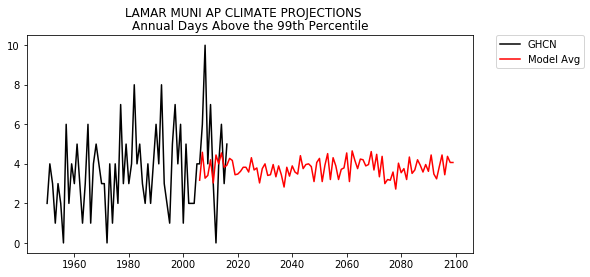

In [8]:
start = time.time()

#Loop through all stations

start = time.time()

midstations = open('/Users/rphinney/Documents/midstations.txt','r')
station_array = []

for n in midstations:
    all_id = n[0:11]
    station_array.append(all_id)

for station in station_array:
    station = station.strip()
    
    #Using ghcnd-stations.txt get the station information

    path = '/Users/rphinney/Documents/Hollings/ghcnd-stations.txt'

    station_file = open(path)
    ghcnd = []

    for x in station_file:
        ghcnd.append(x)

    for each_line in ghcnd:   
        if each_line[0:11] == station:
            station_name = each_line[40:70]
            station_state = each_line[38:40]
            latitude = each_line[13:20]
            longitude = each_line[21:31]
            elevation = each_line[32:38]
            station_name.strip()
            print(station_name)
            print(latitude)
            print(longitude)



    #------------------------------------------------------------------
    #find nearest grid from the livneh file

    filepath = '/Users/rphinney/Documents/Hollings/pr-days-above-99th/rcp85/output_model.nc'
    data = Dataset(filepath)

    lon = data.variables['lon'][:]
    lat = data.variables['lat'][:]
    print(data.variables.keys())
    prcp = data.variables['pr_days_above_99th'][:]


    station_loc = (latitude,longitude)
    min_loc = 9999

    for lons in lon:
        for lats in lat:
            check_loc = (lats,lons)
            b = int(great_circle(station_loc,check_loc).miles)
            if b < min_loc:
                min_loc = b
                min_lat = lats
                min_lon = lons-360

    y = np.arange(1950,2014)           
    #scatter plot the precip values at the grid nearest to the lincoln station
    prcpa = []
    lon_count = -1
    lat_count = -1
    for lons in lon:
        lon_count = lon_count +1
        if lons == min_lon+360:
            for lats in lat:
                lat_count = lat_count + 1
                if lats == min_lat:
                    for x in range (0,94):
                        prcp2 = prcp[x,lat_count,lon_count]
                        prcpa.append(prcp2)

                        #plt.plot(y[x],.03937*prcp[x,lat_count,lon_count],'o', color = 'blue')




    #---------------------------------------------------------------------------
    #find the days above the 99th percentile from the GHCN station

    begin_year = 1950
    end_year = 2013

    mylist = []

    for line in file:
        mylist.append(line)

    daymax = []
    all_prcp = []
    for year in range(1950,2014):
        year_prcp = []
        for line in mylist:
            if int(line[11:15]) == year:
                if line[17:21] == 'PRCP':
                    year_prcp.append(line)

        new_prcp = []
        trace = []
        for data in year_prcp:
            char1 = 22
            char2 = 26
            while char1 != 270:
                if data[char1:char2] == '9999':
                    char1 = char1 + 8
                    char2 = char2 + 8
                else:
                    prcp = (.003937*int(data[char1:char2]))      #convert to inches
                    all_prcp.append(prcp)
                    char1 = char1 + 8
                    char2 = char2 + 8
    all_prcp.extend(all_prcp)

    # sort the data from smallest value to largest
    all_prcp = sorted(all_prcp)

    #find the percentile location
    n_elements = size(all_prcp)
    if n_elements == 0:
        continue
    print(n_elements)

    #Variable can be changed depending on which percentile is being used
    percentile = .99

    loc = int(percentile*n_elements)
    print(loc)

    # find the precipitation value at the percentile location
    RRwn = (all_prcp[loc])


    #find the number of days in which the precipitation amount was greater than the 99th percentile for a given year
    #find the annual amount of precipitation when the daily amount is greater than the 99th percentile

    days = []
    annual = []

    #range of years  ***add code to find this automatically
    #find the first year

    for year in range(1950,2017):
        year_prcp = []
        for line in mylist:
            if int(line[11:15]) == year:
                if line[17:21] == 'PRCP':
                    year_prcp.append(line)

        new_prcp = []
        for data in year_prcp:
            char1 = 22
            char2 = 26
            while char1 != 270:
                if data[char1:char2] == '9999':
                    char1 = char1 + 8
                    char2 = char2 + 8
                else:
                    prcp = (.003937*int(data[char1:char2])) 
                    new_prcp.append(prcp)
                    char1 = char1 + 8
                    char2 = char2 + 8

        day_count = 0  
        annprcp = 0
        for one in new_prcp:
            if one > RRwn:
                day_count = 1 + day_count
                annprcp = one + annprcp


        days.append(day_count)
        annual.append(annprcp)

    x = np.arange(1950,2017)
    a = np.arange(2006,2100)
    #daymax.extend(prcpa)
    print(daymax)
    plt.figure(figsize(8,4))
    plt.plot(x,days, color = 'black', label = 'GHCN')
    plt.plot(a,prcpa, color = 'red', label = 'Model Avg')



    plt.title('Annual Days Above the 99th Percentile')
    plt.suptitle(station_name.strip() + ' CLIMATE PROJECTIONS')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    savefig('/Users/rphinney/Documents/Hollings/GHCN-LOCA_day/'+station+'.png')

end = time.time()
print(end-start)

In [10]:
end = time.time()
print(end-start)

83272.7357480526
